We start by making sure we have the right libraries in our colab environment.

In [1]:
!pip install numpy
!pip install gym[classic_control,atari,accept-rom-license]
!pip install opencv-python
!pip install gym-notebook-wrapper
!sudo apt update && sudo apt install xvfb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ub

Ok let's load them in

In [2]:
import numpy as np
import gym
import gnwrapper
import cv2

Generic function to evaluate an agent on a game

In [10]:
def evaluate_agent(game, agent):
  """
  Evaluates an agent on a given game
    game (string): identifier of the environment in gym
    agent (child class of agent): 
  """
  env = gnwrapper.Animation(gym.make(game))
  state = env.reset()
  env.render()
  
  agent.reset()

  done = False
  total_reward = 0

  # Play until the game is over
  while not done:
    # Agent makes the decision for the next action to play based on the current state
    action = agent.act(state)
    # Perform the action and gather the result
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    # Pass on to the next state
    state = next_state
    env.render()

  return total_reward


Load in your agent in the following cell:

In [4]:
from agent import Agent
agent = Agent(3)

Use your agent to play the game

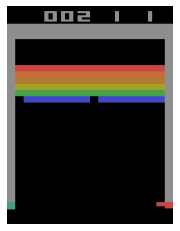

<function print>

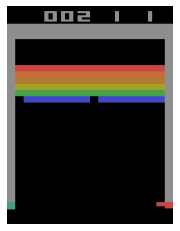

In [12]:
score = evaluate_agent("Breakout-v4", agent)
print(score)